In [202]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
import cv2


minDatapoints  = 50

lfw_people = fetch_lfw_people(min_faces_per_person=minDatapoints,resize=0.4)
n_samples, h, w = lfw_people.images.shape


In [203]:

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X_main = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y_main = lfw_people.target
target_names = lfw_people.target_names
n_classes_main = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes_main)


Total dataset size:
n_samples: 1560
n_features: 1850
n_classes: 12


62

### Vary Number of classes and Perform the same analysis

In [205]:

n_classes = 5 #No of different classses in the Dataset

classLabel = np.random.choice(np.arange(n_classes_main),n_classes,replace=False)

X = list()
y = list()

for i in range(n_samples):
    if(y_main[i] in classLabel ):
        X.append(X_main[i])
        y.append(y_main[i])

X = np.asarray(X)
y = np.asarray(y)

### Making 8 Different Datasets with Increasing no of samples per class

In [206]:
perclass_train_samples = [5,10,15,20,25,30,35,40]
perclass_test_samples  = [1, 2, 3, 5, 6, 7,8,10]

Train = list()
Test  = list()
for i in range(len(perclass_train_samples)):
    
    Train_sample_class_count = np.zeros((n_classes_main))
    Test_sample_class_count  = np.zeros((n_classes_main))
    
    train_sample = perclass_train_samples[i]
    test_sample  = perclass_test_samples[i]
    
    X_train = list()
    y_train = list()
    X_test  = list()
    y_test  = list()
    for i in range(y.shape[0]):
        if(Train_sample_class_count[y[i]] < train_sample):
            
            X_train.append(X[i])
            y_train.append(y[i])
            Train_sample_class_count[y[i]]+=1
            
        elif(Test_sample_class_count[y[i]] < test_sample):
            
            X_test.append(X[i])
            y_test.append(y[i])
            
            Test_sample_class_count[y[i]]+=1
            
    #print(len(X_train),"==",train_sample*n_classes)
    #print(len(X_test),"==",test_sample*n_classes)
    Train.append([np.asarray(X_train),np.asarray(y_train)])
    Test.append([np.asarray(X_test),np.asarray(y_test)])

### Appling the Eigen Faces method 8 dataset

In [207]:
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

PCAacc = list()

for i in range(len(Train)):
    # Taking the i the Dataset
    X_train , y_train  = Train[i]
    X_test  , y_test   = Test[i]
    
    n_components = min(20, X_train.shape[0])
    #print( " Components Used : " , n_components)
    #Calculating the average 
    avgFace = np.mean(X_train,axis = 0)
    
    #Centering the data
    X_train_centred = X_train - avgFace
    X_test_centred  = X_test  - avgFace
    
    #Appling PCA
    pca = PCA(n_components=n_components,whiten='True',svd_solver="randomized").fit(X_train_centred)
    X_train_pca = pca.transform(X_train_centred)
    X_test_pca = pca.transform(X_test_centred)

    ####################################
    # Prediction 
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(X_train_pca,y_train)
    correct=0
    incorrect=0
    predictedLabel = knn.predict(X_test_pca)
    countLabel = np.zeros(n_classes_main)
    for i in range(len(y_test)):
        countLabel[y_test[i]]+=1
        if(y_test[i] ==predictedLabel[i]):
            correct=correct+1
        else:
            
            incorrect=incorrect+1
    #print("Count Label : ",countLabel)
    #print("Accuracy : ",correct/(incorrect+correct))
    
    PCAacc.append(correct/(incorrect+correct))
    

Accuracy :  0.4
Accuracy :  0.4
Accuracy :  0.4
Accuracy :  0.56
Accuracy :  0.36666666666666664
Accuracy :  0.6285714285714286
Accuracy :  0.65
Accuracy :  0.74


In [208]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

LDAacc = list()
for i in range(len(Train)):
    # Taking the i the Dataset
    X_train , y_train  = Train[i]
    X_test  , y_test   = Test[i]
    
    clf = LDA()
    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    correct = 0
    for i in range(y_test.shape[0]):
        if predictions[i]==y_test[i]:
            correct += 1
    #print("Accuracy: ", (correct/len(predictions)))
    LDAacc.append(correct/len(predictions))
    
    

Accuracy:  0.2
Accuracy:  0.4
Accuracy:  0.7333333333333333
Accuracy:  0.64
Accuracy:  0.8333333333333334
Accuracy:  0.8857142857142857
Accuracy:  0.725
Accuracy:  0.78


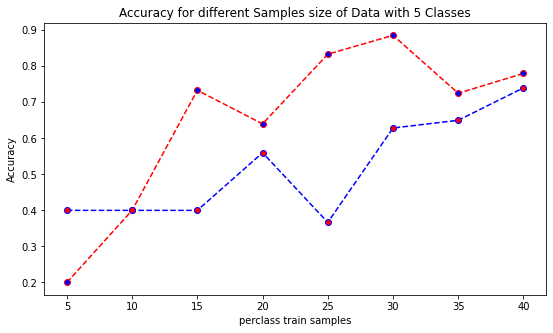

[0, 3, 5, 9, 11]


In [209]:
plt.figure(figsize = ( 9,5 ))

plt.title("Accuracy for different Samples size of Data with "+str(n_classes) + " Classes")
plt.xlabel("perclass train samples")
plt.ylabel("Accuracy");
plt.plot( perclass_train_samples ,LDAacc,'--o',color='r',markerfacecolor='blue')
plt.plot( perclass_train_samples,PCAacc,'--o',color='b',markerfacecolor='red')
plt.show()

print(sorted(classLabel))

[0, 2, 3, 6, 7, 8, 10]
